<a href="https://colab.research.google.com/github/LevFRFR/boston-regression/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Problem

### Objective
Accurately predict the median housing value of owner-occupied homes in Boston.


## The Data

### Get the Data

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### Convert into a format for easy manipulation

In [ ]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_target = pd.DataFrame(boston.target, columns=['MEDV'])
boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
boston_df.info()

# no need for imputing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


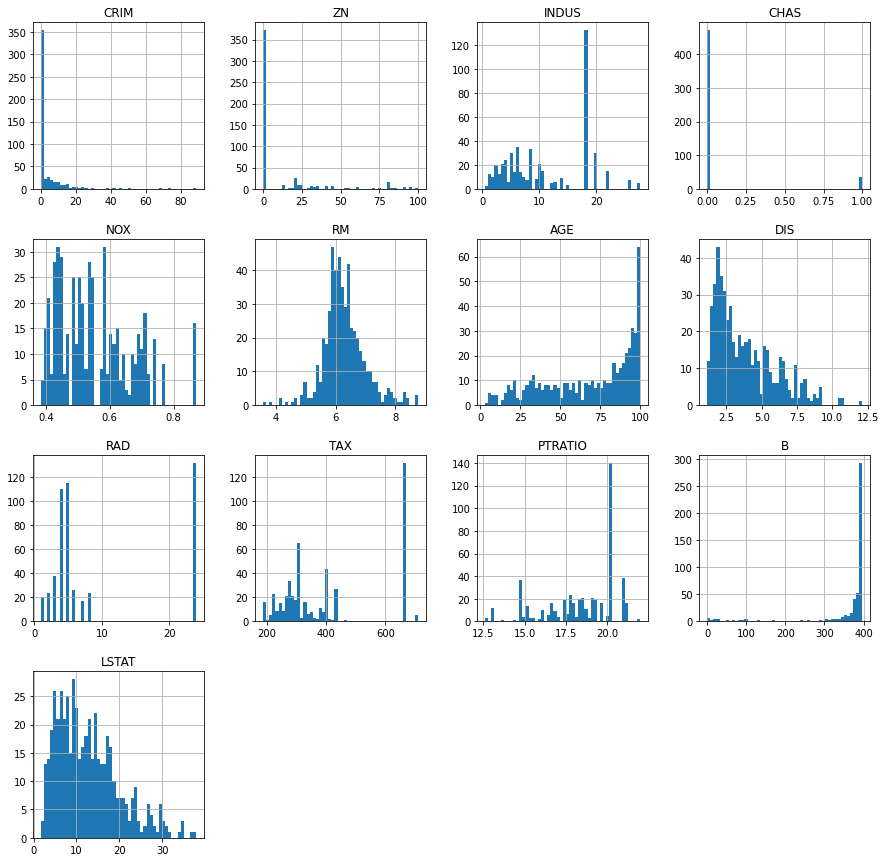

In [ ]:
import matplotlib.pyplot as plt

boston_df.hist(bins=50, figsize=(15,15))
plt.show()

In [ ]:
boston_df.describe()

# many features seem to have outliers of sorts

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Sample a test set and put it aside

In [ ]:
# let's use stratified train-test split
# for that, identify important attributes
# we can use a correlation matrix to do so

full_boston = pd.concat([boston_df, boston_target], axis=1)
full_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# get a quick correlation matrix going

corr_matrix = full_boston.corr()

abs(corr_matrix['MEDV']).sort_values(ascending=False)
# absolute value to see the magnitude
# regardless of positive or negative correlation

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

train_set, test_set = train_test_split(full_boston, random_state=42)
# stratify=full_boston['LSTAT'] <- excluded stratified sampling
# because least populated class in 'LSTAT' has only 1 member, which is too few
full_boston['LSTAT'].value_counts(ascending=True)

4.98     1
8.01     1
6.75     1
7.83     1
9.09     1
        ..
14.10    3
7.79     3
8.05     3
18.13    3
6.36     3
Name: LSTAT, Length: 455, dtype: int64

<AxesSubplot:ylabel='Density'>

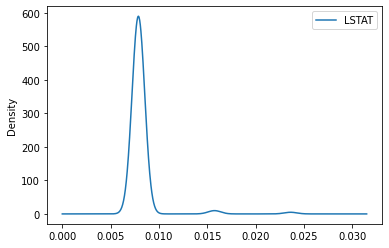

In [ ]:
data = test_set['LSTAT'].value_counts() / len(test_set)

pd.DataFrame(data).plot(kind='density')

# it doesn't look like the test dataset has a broad
# representation of different strata's 
# for the most important correlatory attribute

# let's try make a stratified train-test split now...

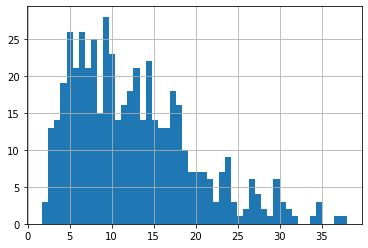

In [ ]:
boston_df['LSTAT'].hist(bins=50)

full_boston['LSTAT_cat'] = pd.cut(full_boston['LSTAT'],
                                  bins=[0.,4,7.5,16,25,np.inf],
                                  labels=[1,2,3,4,5])

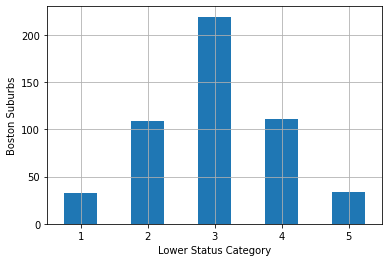

In [ ]:
full_boston['LSTAT_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Lower Status Category')
plt.ylabel('Boston Suburbs')
plt.show()

# looks bang on

In [ ]:
train_set, test_set = train_test_split(full_boston, random_state=42, test_size=0.2, stratify=full_boston['LSTAT_cat'])

<AxesSubplot:ylabel='Density'>

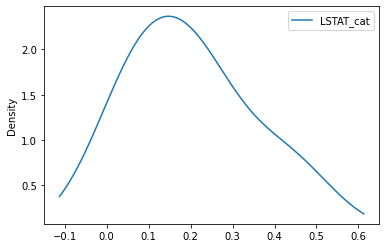

In [ ]:
data = test_set['LSTAT_cat'].value_counts() / len(test_set)

pd.DataFrame(data).plot(kind='density')

# very nice

In [ ]:
import pickle

path = '/content/drive/MyDrive/Colab Notebooks/ml project #2 2023-02-24/'

# now we got a hopefully well-stratified split, so we can remove this column now
for _file, _set in {'trainSet':train_set, 'testSet':test_set}.items():
  _set.drop('LSTAT_cat', axis=1, inplace=True)

  # saving the train and test sets, to do EDA in a separate notebook
  with open(path + f'boston_{_file}.pkl', 'wb') as f:
    pickle.dump(_set, f)

### Prepare the data

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

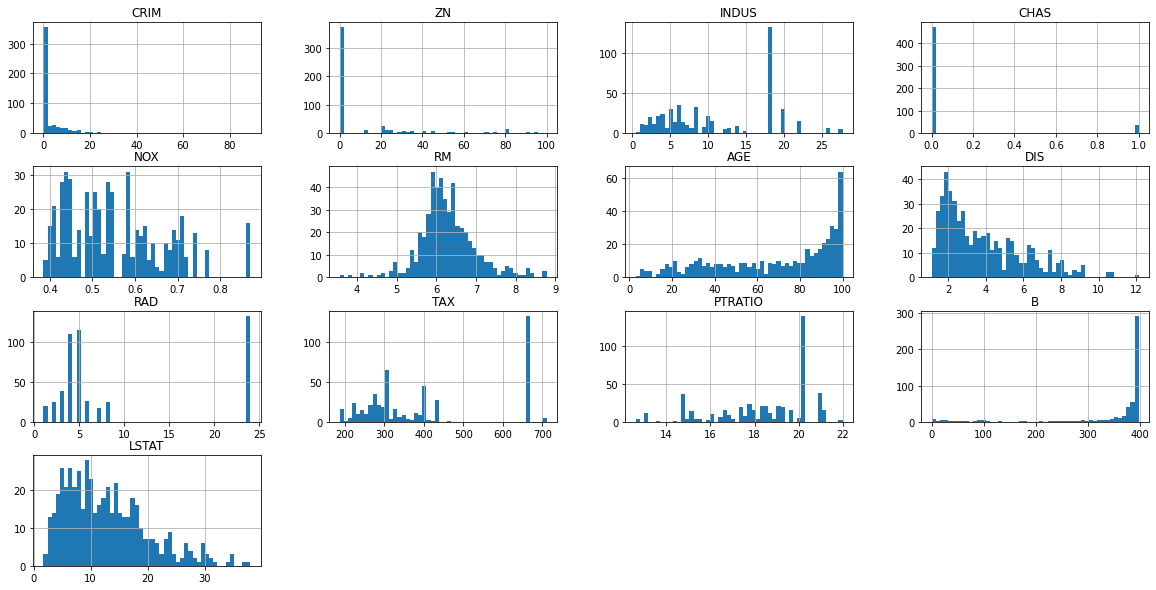

In [ ]:
boston_df.hist(bins=50, figsize=(20,10))
plt.show()

#### Feature Scaling Plan
* `CRIM`, `INDUS`, `NOX`, `AGE`, `DIS`, `TAX`, `PTRATIO`, `B`, `LSTAT` - quantile transform then scale
* `ZN` - split into zero and non-zero for categorical, the non-zeroes are quantile transformed and scaled
* `CHAS` - encode as one-of-k 
* `RAD` - ordinal encoder (higher index is better accessibility) or binirization (every 5 ranks) and then 1hot encoded.
* `RM` - scale


Notes: `AGE` has a max value of 100 years, with 32 observations


Task: Create a Feature Engineering Plan

In [ ]:
boston_df = train_set.copy()

In [ ]:
boston_df.info()

# no missing values
# all numeric values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 345 to 232
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


In [ ]:
selected_feature = 'LSTAT'

##### Quintile Transform

<AxesSubplot:>

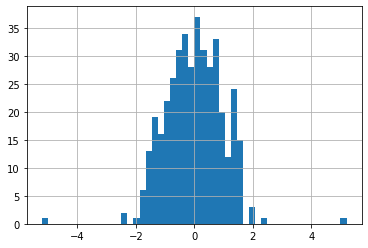

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(
    output_distribution='normal', 
    random_state=42, 
    n_quantiles=10) # can use n_quantiles as a hyper parameter

feat_qt_trans = qt.fit_transform(boston_df[[selected_feature]])

pd.Series(feat_qt_trans.reshape(-1)).hist(bins=50)

##### Logarithmic Transform

<AxesSubplot:>

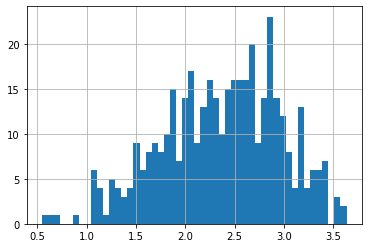

In [ ]:
(boston_df[selected_feature]).transform(np.log).hist(bins=50)

##### Power Transform

<AxesSubplot:>

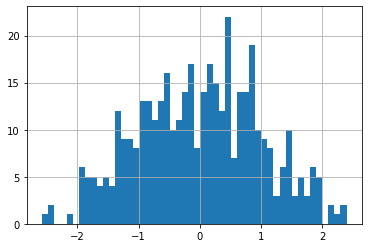

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Create a PowerTransformer object with the desired method ('box-cox' or 'yeo-johnson')
pt = PowerTransformer(method='box-cox')

# Fit the transformer to the feature data and transform the feature
feat_bc_pt = pt.fit_transform(boston_df[[selected_feature]])

pd.Series(feat_bc_pt.reshape(-1)).hist(bins=50)

<AxesSubplot:>

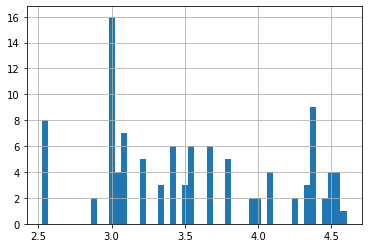

In [ ]:
ZN_nz = boston_df['ZN'][boston_df['ZN']>0]

ZN_nz.transform(np.log).hist(bins=50)

#### Trying out different preprocessing pipelines

##### Basic Preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn
sklearn.set_config(display = 'diagram')

num_attributes = ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM', 'ZN']
cat_attributes = ['CHAS', 'RAD']

num_pipeline = make_pipeline(
    StandardScaler()
)

cat_pipeline = make_pipeline(
    OneHotEncoder()
)

basic_preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

##### Detailed Preprocessing

In [ ]:
# creating a custom transformer for ZN
# where it will create two features out of the original ZN
# first will be ZN_cat (1,0), second is ZN_nonzero

from sklearn.base import BaseEstimator, TransformerMixin

class ZNTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_type='num'):
        self.col_type = col_type
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['ZN_nonzero'] = np.where(X_transformed['ZN'] == 0, np.nan, X_transformed['ZN'])
        X_transformed['ZN_cat'] = (X_transformed['ZN'] != 0).astype(int)
        if self.col_type == 'num':
            return X_transformed[['ZN_nonzero']]
        elif self.col_type == 'cat':
            return X_transformed[['ZN_cat']]
        else:
            raise ValueError("Invalid column type: choose 'num' or 'cat'.")

In [ ]:
zn_transform = ZNTransformer(col_type = 'num')

feat_zn = zn_transform.fit_transform(boston_df[['ZN']])

feat_zn.head()

,ZN_nonzero
345,NaN
478,NaN
238,30.0
250,22.0
393,NaN


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures

qt_attributes = ['INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']

qt_pipeline = make_pipeline(
    QuantileTransformer(
      output_distribution='normal', 
      random_state=42, 
      n_quantiles=10
    ),
    StandardScaler()
)

zn_cat_pipeline = make_pipeline(
    ZNTransformer(col_type='cat'),
    OneHotEncoder()
)

zn_num_pipeline = make_pipeline(
    ZNTransformer(col_type='num'),
    SimpleImputer(strategy='mean'),
    QuantileTransformer(
      output_distribution='normal', 
      random_state=42, 
      n_quantiles=5
    )
)

default_num_pipeline = make_pipeline(
    StandardScaler()
)

detailed_preprocessing = ColumnTransformer([
    ('num_qt_scaled', qt_pipeline, qt_attributes),
    ('num_scaled', StandardScaler(), ['RM']),
    ('num_polynomial', PolynomialFeatures(2), ['CRIM', 'B']),
    ('cat_1hot', OneHotEncoder(), ['CHAS', 'RAD']),
    # ('cat_ord', OrdinalEncoder(), ['RAD']),
    ('zn_cat', zn_cat_pipeline, ['ZN']),
    ('zn_num', zn_num_pipeline, ['ZN'])
]) #, remainder=default_num_pipeline

#### Accuracy testing

Using simple Linear Regression

In [ ]:
boston_data = boston_df.drop('MEDV', axis=1)
boston_target = boston_df['MEDV'].copy()

##### Trivial Baseline Model

In [ ]:
# create a trivial predictor
y_mean = np.mean(boston_target)
y_trivial = np.full_like(boston_target, y_mean)
trivial_rmse = np.sqrt(mean_squared_error(boston_target, y_trivial))
trivial_rmse

9.119995848117446

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(basic_preprocessing, LinearRegression())

lin_reg.fit(boston_data, boston_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CRIM', 'INDUS', 'NOX',
                                                   'AGE', 'DIS', 'TAX',
                                                   'PTRATIO', 'B', 'LSTAT',
                                                   'RM', 'ZN']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['CHAS', 'RAD'])])),
                ('linearregression', LinearRegression())])

In [ ]:
boston_predictions = lin_reg.predict(boston_data)
boston_predictions[:5].round(1)

array([17.7, 19.2, 26.4, 24. , 20.2])

In [ ]:
boston_target.iloc[:5].values

array([17.5, 14.6, 23.7, 24.4, 13.8])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(boston_target, boston_predictions, squared=False)
lin_rmse

4.448600676774725

##### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = make_pipeline(detailed_preprocessing, SVR(kernel='linear'))

svr.fit(boston_data, boston_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('num_qt_scaled',
                                                  Pipeline(steps=[('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=10,
                                                                                       output_distribution='normal',
                                                                                       random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['INDUS', 'NOX', 'AGE', 'DIS',
                                                   'TAX', 'PTRATIO...
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer(col_type='cat')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ZN']),
                                                 ('zn_num',
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=10,
                                                                                       output_distribution='normal',
                                                                                       random_state=42))]),
                                                  ['ZN'])])),
                ('svr', SVR(kernel='linear'))])

In [ ]:
boston_predictions_svr = svr.predict(boston_data)
mean_squared_error(boston_target, boston_predictions_svr, squared=False)

1280.7689527801588

##### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create k-Nearest Neighbors Regression model with k=5
knn = make_pipeline(detailed_preprocessing, KNeighborsRegressor(n_neighbors=5))

# Train the model on the training set
knn.fit(boston_data, boston_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('num_qt_scaled',
                                                  Pipeline(steps=[('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=10,
                                                                                       output_distribution='normal',
                                                                                       random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['INDUS', 'NOX', 'AGE', 'DIS',
                                                   'TAX', 'PTRATIO...
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer(col_type='cat')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ZN']),
                                                 ('zn_num',
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=10,
                                                                                       output_distribution='normal',
                                                                                       random_state=42))]),
                                                  ['ZN'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
boston_predictions_knn = knn.predict(boston_data)
mean_squared_error(boston_target, boston_predictions_knn, squared=False)

6.596599784197256

##### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regression model with 100 trees
gbr = make_pipeline(detailed_preprocessing, GradientBoostingRegressor(n_estimators=100))

# Train the model on the training set
gbr.fit(boston_data, boston_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_qt_scaled',
                                                  Pipeline(steps=[('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=10,
                                                                                       output_distribution='normal',
                                                                                       random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['INDUS', 'NOX', 'AGE', 'DIS',
                                                   'TAX', 'PTRATIO', 'LSTAT']),
                                                 ('num_scaled',
                                                  StandardScaler(), ['RM']),
                                                 ('num_polynom...
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer(col_type='cat')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ZN']),
                                                 ('zn_num',
                                                  Pipeline(steps=[('zntransformer',
                                                                   ZNTransformer()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=5,
                                                                                       output_distribution='normal',
                                                                                       random_state=42))]),
                                                  ['ZN'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [ ]:
boston_predictions_gbr = gbr.predict(boston_data)
rmse_gbr = mean_squared_error(boston_target, boston_predictions_gbr, squared=False)
print(f'RMSE of Gradient Boosting Regressor: {rmse_gbr.round(2)}')

RMSE of Gradient Boosting Regressor: 1.34


In [ ]:
# let's use k-fold cross validation to see some more evaluation scores

from sklearn.model_selection import cross_val_score

gbr_rmses = -cross_val_score(
    gbr, 
    boston_data, 
    boston_target, 
    scoring='neg_root_mean_squared_error', 
    cv = 10
)

pd.Series(gbr_rmses).describe()

0    3.242589
1    2.452069
2    3.190915
3    2.383531
4    4.621024
5    2.802636
6    4.889259
7    3.215274
8    2.274341
9    2.192675
dtype: float64

##### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create a random forest regressor with 100 trees
rf = make_pipeline(basic_preprocessing, RandomForestRegressor(n_estimators=100, random_state=42))

# fit the model to the training data
rf.fit(boston_data, boston_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CRIM', 'INDUS', 'NOX',
                                                   'AGE', 'DIS', 'TAX',
                                                   'PTRATIO', 'B', 'LSTAT',
                                                   'RM', 'ZN']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['CHAS', 'RAD'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# predict on the test data
boston_predictions_rf = rf.predict(boston_data)

# calculate the root mean squared error
rmse_rf = mean_squared_error(boston_target, boston_predictions_rf, squared=False)
print(f'RMSE of Random Forest Regressor: {rmse_rf.round(2)}')

RMSE of Random Forest Regressor: 1.32


In [ ]:
rf_rmses = -cross_val_score(
    rf,
    boston_data, 
    boston_target, 
    scoring='neg_root_mean_squared_error', 
    cv = 10
)

pd.Series(rf_rmses).describe()

count    10.000000
mean      3.293776
std       1.168087
min       2.355095
25%       2.440356
50%       2.704325
75%       3.633785
max       5.455518
dtype: float64

Both GBR and RFR offer similar results when we look at cross validated scores.

Likewise, the standard deviation in predictions is also head-to-head.

Let's look whether this can change at the Fine-Tuning stage.

### Short List Promising Models

- Gradient Boosting Regressor
- Random Forest Regression

### Fine-Tune the System

#### Tuning Hyperparameters

In [ ]:
gbr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'gradientboostingregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num_qt_scaled', 'columntransformer__num_scaled', 'columntransformer__num_polynomial', 'columntransformer__cat_1hot', 'columntransformer__zn_cat', 'columntransformer__zn_num', 'columntransformer__num_qt_scaled__memory', 'columntransformer__num_qt_scaled__steps', 'columntransformer__num_qt_scaled__verbose', 'columntransformer__num_qt_scaled__quantiletransformer', 'columntransformer__num_qt_scaled__standardscaler', 'columntransformer__num_qt_scaled__quantiletransformer__copy', 'columntransformer__num_qt_scaled__quantiletransformer__ignore_implicit_zeros', 'columntransformer__num_qt_scaled__quantiletransformer__n_quantiles', 'colu

#### Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessing', detailed_preprocessing),
    ('gbr', GradientBoostingRegressor(random_state=42, n_estimators=100))
])

param_grid = [
    {'preprocessing__num_qt_scaled__quantiletransformer__n_quantiles':[5,15,50,100],
     'preprocessing__num_polynomial__degree':[2,3,4,5],
     'gbr__n_estimators': [100,150,200,250]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                           scoring='neg_root_mean_squared_error')

grid_search.fit(boston_data, boston_target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_qt_scaled',
                                                                         Pipeline(steps=[('quantiletransformer',
                                                                                          QuantileTransformer(n_quantiles=10,
                                                                                                              output_distribution='normal',
                                                                                                              random_state=42)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['INDUS',
                                                                          'NOX',
                                                                          'AGE',
                                                                          'DIS',
                                                                          'TAX',
                                                                          'PTRATIO',
                                                                          'LSTAT']),
                                                                        ('num_scaled',
                                                                         StandardScaler...
                                                                                          QuantileTransformer(n_quantiles=5,
                                                                                                              output_distribution='normal',
                                                                                                              random_state=42))]),
                                                                         ['ZN'])])),
                                       ('gbr',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid=[{'gbr__n_estimators': [100, 150, 200, 250],
                          'preprocessing__num_polynomial__degree': [2, 3, 4, 5],
                          'preprocessing__num_qt_scaled__quantiletransformer__n_quantiles': [5,
                                                                                             15,
                                                                                             50,
                                                                                             100]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'gbr__n_estimators': 150,
 'preprocessing__num_polynomial__degree': 5,
 'preprocessing__num_qt_scaled__quantiletransformer__n_quantiles': 15}

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)

# extra code to change the sign on score columns
score_cols = ["split0_test_score", "split1_test_score", "split2_test_score", "mean_test_score"]
cv_res[score_cols] = -cv_res[score_cols].round(2)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbr__n_estimators,param_preprocessing__num_polynomial__degree,param_preprocessing__num_qt_scaled__quantiletransformer__n_quantiles,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,0.478695,0.008434,0.030759,0.002112,150,5,15,"{'gbr__n_estimators': 150, 'preprocessing__num...",3.29,3.42,3.07,3.26,0.145668,1
31,0.375208,0.078936,0.025041,0.005959,150,5,100,"{'gbr__n_estimators': 150, 'preprocessing__num...",3.29,3.43,3.07,3.26,0.146545,2
30,0.472121,0.001281,0.031084,0.002347,150,5,50,"{'gbr__n_estimators': 150, 'preprocessing__num...",3.29,3.43,3.07,3.27,0.145485,3
28,0.378073,0.072875,0.027450,0.003783,150,5,5,"{'gbr__n_estimators': 150, 'preprocessing__num...",3.29,3.45,3.07,3.27,0.153343,4
9,0.189283,0.003866,0.019926,0.000095,100,4,15,"{'gbr__n_estimators': 100, 'preprocessing__num...",3.28,3.35,3.18,3.27,0.070154,5


#### Compiling Final Model

In [ ]:
final_model = grid_search.best_estimator_
final_model['gbr'].feature_importances_

# cannot get feature names out because 
# zntransformer doesn't provide get_feature_names_out() method

array([1.53905066e-03, 3.22865339e-02, 7.29182008e-03, 5.99412648e-02,
       1.18110230e-02, 5.58201272e-02, 4.61579768e-01, 3.27653300e-01,
       0.00000000e+00, 4.67830584e-03, 2.80377623e-03, 1.37891385e-03,
       2.12739296e-03, 1.40981273e-03, 1.89911258e-03, 2.16640306e-04,
       6.81608131e-04, 9.51819332e-04, 2.28328187e-03, 1.34965880e-03,
       3.99534887e-04, 2.09113762e-03, 2.20413279e-03, 4.45471250e-04,
       5.33831522e-03, 5.86908587e-04, 1.98373972e-04, 6.76160405e-03,
       1.51885459e-03, 1.21919373e-04, 3.31897315e-05, 8.42045303e-04,
       9.72511282e-06, 3.71932316e-05, 3.24010356e-04, 0.00000000e+00,
       1.41831155e-04, 1.85001864e-04, 2.82513996e-05, 0.00000000e+00,
       1.29510481e-04, 1.03481741e-05, 8.89430180e-04])

#### Evaluating on the Test Set

In [ ]:
boston_test_data = test_set.drop('MEDV', axis=1)
boston_test_target = test_set['MEDV'].copy()

In [ ]:
final_predictions = final_model.predict(boston_test_data)

In [ ]:
# calculate the root mean squared error on test set
final_rmse = mean_squared_error(boston_test_target, final_predictions, squared=False)
print(f'Final RMSE: {final_rmse.round(2)}')

Final RMSE: 2.51


##### Confidence Interval on Generalization Error

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - boston_test_target) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)
    ) 
)

# at 95% confidence
# the model's true performance 
# in the population would land between 1.9 and 3.0 RMSE 

array([1.90031031, 3.00337124])

### Launch Model

#### Saving your model

In [ ]:
import joblib

joblib.dump(final_model, path + 'my_boston_housing_model_v1.pkl')

['/content/drive/MyDrive/Colab Notebooks/ml project #2 2023-02-24/my_boston_housing_model_v1.pkl']